In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import linear_model

In [2]:
df = pd.read_csv("prepared_data.csv")
df=df.drop(columns=['Count','Unnamed: 0','CouncilArea'])
df.head()


Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bathroom  Car  Landsize          YearBuilt  \
0  3/12/2016       2.5    3067.0       1.0  1.0     202.0  [[1954.09294906]]   
1  4/02/2016       2.5    3067.0       1.0  0.0     156.0             1900.0   
2  4/03/2017       2.5    3067.0       2.0  0.0     134.0             1900.0   
3  4/03/2017       2.5    3067.0       2.0  1.0      94.0  [[1954.09294906]]   
4  4/06/2016       2.5    3067.0       1.0  2.0     120.0             2014.0   

              Regionname              Age      Historic  
0  Northern Metropolitan  [[66.90705094]]      Historic  
1  Northern Metropolitan            121.0      Historic  
2  Northern Metropolitan            121.0      Historic  
3  Northern Metropolitan  [[66.90705094]]      Historic  
4  Northern Metropolitan              7.0  Contemporary

In [3]:
#unique values of each of the features to check for duplication, here you can see the address column has some duplicates.
df.nunique()

Suburb          312
Address       12864
Rooms             5
Type              3
Price          2040
Method            5
SellerG         264
Date             58
Distance        200
Postcode        196
Bathroom          7
Car               5
Landsize       1388
YearBuilt       322
Regionname        8
Age             322
Historic          2
dtype: int64

In [4]:
df.isnull().sum()

Suburb        0
Address       0
Rooms         0
Type          0
Price         0
Method        0
SellerG       0
Date          0
Distance      0
Postcode      0
Bathroom      0
Car           0
Landsize      0
YearBuilt     0
Regionname    0
Age           0
Historic      0
dtype: int64

# IMPLEMENTATION OF CLASSIFICATION ALGORITHMS
There are few classification problems identified for the experiment which includes, binary and multiclass classification.
1) BINARY CLASSIFICATION: There is a new feature in dataset Historic, which labels house as 'Historic' if it is 55 years old or older, and rest of the houses are labelled as 'Contemporary'.

2)MULTICLASS CLASSIFICATION: There is a feature 'Type' which is the type of the house is, which is of three type ['h':house,'t':townhouse,'u':unit], the algorithms are used to predict the type of house based on various features.

# DECISION TREE TO CLASSIFY HOUSES BASED ON LABEL ['HISTORIC','CONTEMPORARY']
The main goal using this algorithm is the creation of a model which predicts the value of a target variable using the training data provided to it. It uses simple learning decision rules on the training data.  
The model uses a tree representation model for it’s working. For predicting a class label, the start is from the root of a tree. Then for every attribute of the record, comparison is done with the root of the tree and based on the result of comparison, the branch corresponding to that value is followed. 
Decision Tree makes use of different algorithms for decision of splitting a node into multiple sub-nodes. The purity of a node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then on basis of which split results in most homogenous sub-nodes, it selects them.

In [5]:
dt_df =df

In [6]:
dt_df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bathroom  Car  Landsize          YearBuilt  \
0  3/12/2016       2.5    3067.0       1.0  1.0     202.0  [[1954.09294906]]   
1  4/02/2016       2.5    3067.0       1.0  0.0     156.0             1900.0   
2  4/03/2017       2.5    3067.0       2.0  0.0     134.0             1900.0   
3  4/03/2017       2.5    3067.0       2.0  1.0      94.0  [[1954.09294906]]   
4  4/06/2016       2.5    3067.0       1.0  2.0     120.0             2014.0   

              Regionname              Age      Historic  
0  Northern Metropolitan  [[66.90705094]]      Historic  
1  Northern Metropolitan            121.0      Historic  
2  Northern Metropolitan            121.0      Historic  
3  Northern Metropolitan  [[66.90705094]]      Historic  
4  Northern Metropolitan              7.0  Contemporary

In [7]:
dt_df.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [8]:
dt_df.Historic.unique()

array(['Historic', 'Contemporary'], dtype=object)

# LABEL ENCODING:
This means convert the data from labels to numeric form, so that the machine can process the data and make decisions. For example label encoding for 'Historic' column work as such:
Historic:1, Contemporary:0

In [9]:
from sklearn.preprocessing import LabelEncoder 
#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 
 #fitting and transforming the desired categorical column.
dt_df['Historic'] = labelencoder.fit_transform(dt_df['Historic'])
 #fitting and transforming the desired categorical column.
dt_df['Type'] = labelencoder.fit_transform(dt_df['Type']) 
 #fitting and transforming the desired categorical column.
dt_df['Suburb'] = labelencoder.fit_transform(dt_df['Suburb'])
 #fitting and transforming the desired categorical column.
dt_df['Address'] = labelencoder.fit_transform(dt_df['Address'])
 #fitting and transforming the desired categorical column.
dt_df['Method'] = labelencoder.fit_transform(dt_df['Method']) 
#fitting and transforming the desired categorical column.
dt_df['Regionname'] = labelencoder.fit_transform(dt_df['Regionname'])
#fitting and transforming the desired categorical column.
dt_df['SellerG'] = labelencoder.fit_transform(dt_df['SellerG'])



In [10]:
#drop few columns for better results
dt_df=dt_df.drop(columns=['YearBuilt','Date','Age'])
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      12864 non-null  int64  
 1   Address     12864 non-null  int64  
 2   Rooms       12864 non-null  int64  
 3   Type        12864 non-null  int64  
 4   Price       12864 non-null  float64
 5   Method      12864 non-null  int64  
 6   SellerG     12864 non-null  int64  
 7   Distance    12864 non-null  float64
 8   Postcode    12864 non-null  float64
 9   Bathroom    12864 non-null  float64
 10  Car         12864 non-null  float64
 11  Landsize    12864 non-null  float64
 12  Regionname  12864 non-null  int64  
 13  Historic    12864 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.4 MB


In [11]:
l=[]
for i in dt_df:
    if i != 'Historic':
        l.append(i)
print(dt_df['Type'].unique())
print(dt_df['Historic'].unique())

print(l)

[0 2 1]
[1 0]
['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'Regionname']


## FEATURE SELECTION:

### INFORMATION GAIN METHOD:

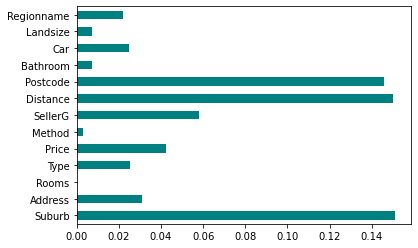

In [12]:
#graph shows all the features with highest information gain ratio.
feature_cols=l
X = dt_df[feature_cols]
y = dt_df.Historic
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importance=mutual_info_classif(X,y)
feat_importances=pd.Series(importance,dt_df.columns[0:len(dt_df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

# Chi Squared Test for Feature Selection:
For 2 different variables we can get the expected and the observed value. By applying the below formula, we can get the chi-square value. When we try to get the best feature, the feature tends to be highly dependent on another feature. 
Mathematically speaking, the chi square indicates the value of dependency of one feature on another feature and vice- versa. So, simply if the chi square value is higher between 2 variables it implies that one of the variables is highly dependent on the another and one of those can be used in the machine learning model to predict the other feature. 

In [13]:
# the data is tranformed such that only desired features are picked
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X_new = pd.DataFrame(SelectKBest(chi2, k=6).fit_transform(X, y))
X_new.head()


0    1          2    3       4      5
0  12310.0  0.0  1480000.0  2.5  3067.0  202.0
1   5724.0  0.0  1035000.0  2.5  3067.0  156.0
2   9446.0  0.0  1465000.0  2.5  3067.0  134.0
3   8682.0  0.0   850000.0  2.5  3067.0   94.0
4  10193.0  0.0  1600000.0  2.5  3067.0  120.0

# Feature Scaling
Formula: x'=(x-min(x))/(max(x)-min(x))

In [14]:
#scale the data using MinMax Scaling
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

### IDENTIFY THE DEPTH OF DECISION TREE TO BE BUILT:

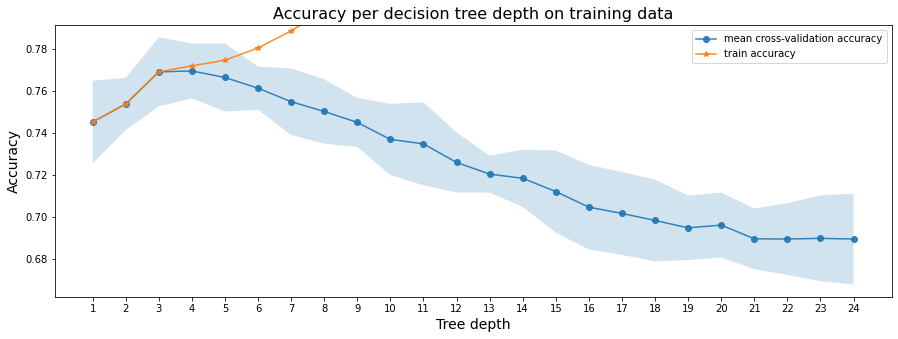

In [15]:
#graph identifies the best depth of the decision tree that can be used
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(Xtrain, ytrain, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



### TRAINING AND TESTING THE MODEL

In [16]:
# fit a classification tree with max_depth=3 as it yields the best testing accuracy
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
# Fit our training data
treeclf.fit(Xtrain, ytrain)
treeclf.predict(Xtest)

array([1, 0, 0, ..., 0, 1, 1])

### EVALUATION OF MODEL BUILT:

In [17]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.7691026210573079
Testing accuracy : 0.7712435233160622


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [0.78024417 0.77802442 0.7791343  0.76470588 0.77888889 0.75888889
 0.74111111 0.76555556 0.78222222 0.76222222]
Mean Accuracy: 0.7690997656924405


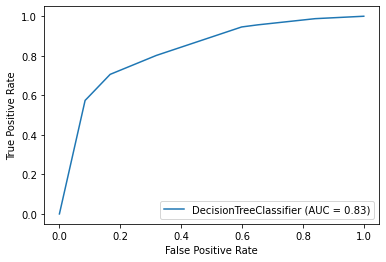

In [19]:
from sklearn import metrics
metrics.plot_roc_curve(treeclf, Xtest, ytest)  

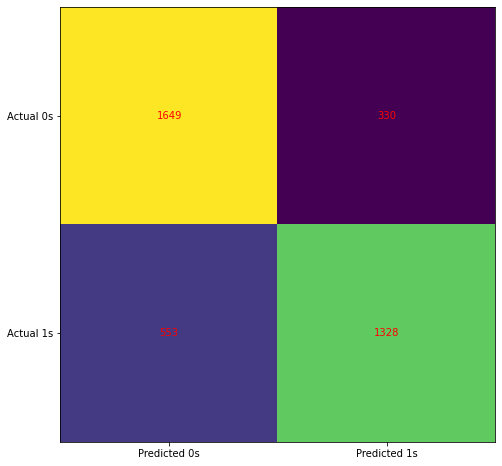

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(ytest, treeclf.predict(Xtest))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [21]:
print(classification_report(ytest, treeclf.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1979
           1       0.80      0.71      0.75      1881

    accuracy                           0.77      3860
   macro avg       0.77      0.77      0.77      3860
weighted avg       0.77      0.77      0.77      3860



### VISUALISE THE DECISION TREE:

In [22]:
from sklearn import tree
text_representation = tree.export_text(treeclf)
print(text_representation)

|--- feature_3 <= 0.22
|   |--- feature_1 <= 0.25
|   |   |--- feature_5 <= 0.01
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.01
|   |   |   |--- class: 1
|   |--- feature_1 >  0.25
|   |   |--- feature_4 <= 0.12
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.12
|   |   |   |--- class: 1
|--- feature_3 >  0.22
|   |--- feature_5 <= 0.03
|   |   |--- feature_5 <= 0.01
|   |   |   |--- class: 0
|   |   |--- feature_5 >  0.01
|   |   |   |--- class: 0
|   |--- feature_5 >  0.03
|   |   |--- feature_3 <= 0.31
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.31
|   |   |   |--- class: 0



In [23]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(500,200))
cn=['Contemporary','Historic']
picture = tree.plot_tree(treeclf,node_ids=True,class_names=cn,filled=True)

#### PREDICT THE RESULT OF A DATA RECORD:

In [24]:
print(treeclf.predict(Xtest[1].reshape(1, -1)))
print(Xtest[1].reshape(1, -1))

[0]
[[0.01710465 0.         0.49843478 0.23255814 0.15046059 0.05108911]]


# LOGISTIC REGRESSION TO CLASSIFY HOUSES BASED ON LABEL ['HISTORIC','CONTEMPORARY']
Logistic regression is a simple supervised machine learning algorithm which is used as an alternative to simple linear regression. The difference between linear and logistic regression is that the linear regression tries to represent the relationship as a straight line whereas logistic regression tries to represent the relationship as a natural logarithmic function. Logarithmic regression tries to calculate the probability by using the concept of odd ratios. Simply, put it uses the odd of not happening an event against odd of happening the event. Logistic regression than uses the above-mentioned method of odds to predict a logarithmic equation to fit the data. 

### TRAINING AND TESTING THE MODEL

In [25]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression()
clf_LR.fit(Xtrain,ytrain)

LogisticRegression()

### EVALUATION OF MODEL BUILT:

In [26]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, clf_LR.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, clf_LR.predict(Xtest))))

Training accuracy: 0.7313416259440249
Testing accuracy : 0.7240932642487047


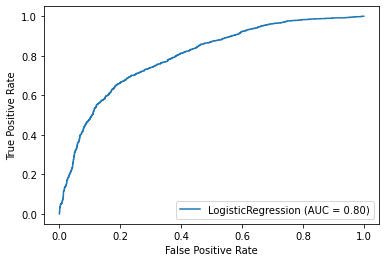

In [27]:
from sklearn import metrics
metrics.plot_roc_curve(clf_LR, Xtest, ytest)  

In [28]:
#parameter of the model built
clf_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

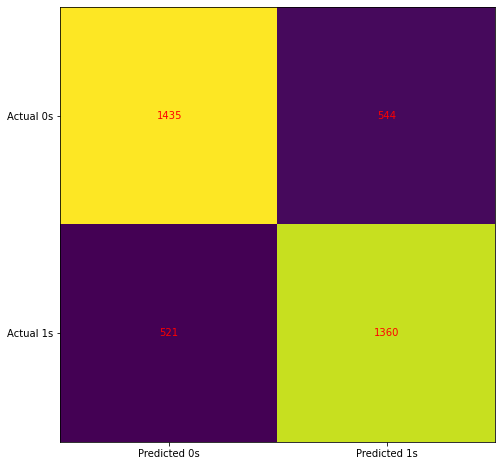

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(ytest, clf_LR.predict(Xtest))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [30]:
print(classification_report(ytest, clf_LR.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1979
           1       0.71      0.72      0.72      1881

    accuracy                           0.72      3860
   macro avg       0.72      0.72      0.72      3860
weighted avg       0.72      0.72      0.72      3860



In [31]:
clf_LR.predict(Xtest[1].reshape(1, -1))

array([1])

# Support Vector Class

### TRAINING AND TESTING THE MODEL

In [32]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='linear')
svcclassifier.fit(Xtrain, ytrain)

SVC(kernel='linear')

### EVALUATION OF MODEL BUILT:

Accuracy: 0.7295336787564767


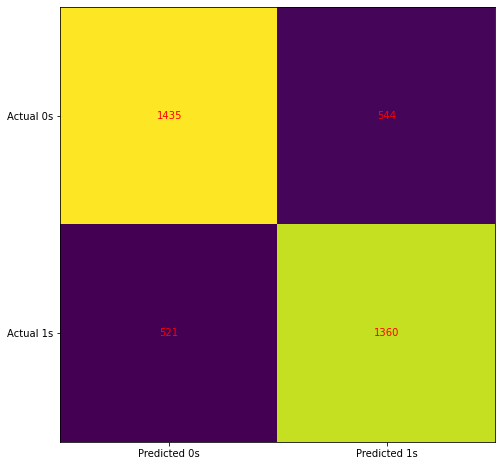

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1979
           1       0.72      0.73      0.72      1881

    accuracy                           0.73      3860
   macro avg       0.73      0.73      0.73      3860
weighted avg       0.73      0.73      0.73      3860



In [33]:
y_pred = svcclassifier.predict(Xtest)
#scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
from sklearn.metrics import classification_report, confusion_matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix(ytest, y_pred))
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(ytest, y_pred))

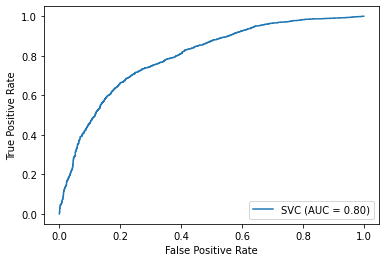

In [34]:
from sklearn import metrics
metrics.plot_roc_curve(svcclassifier, Xtest, ytest)  

In [35]:
w = svcclassifier.coef_[0]
print(w)

[  0.12972789  -1.2903951    1.01755763 -11.12585361   0.84223989
   0.17133977]


In [36]:
svcclassifier.predict(Xtrain[1].reshape(1, -1))

array([1])

# Apply PCA to Original dataset and Imlpement all of the algorithms:
PCA reduces the number of data features in the dataset, thus the training and testing takes less number of features, this comes in handy when the dataset has large number of features, the accuracy can still be attained even after dimensions or the reduction of number of features.

In [37]:
from sklearn.decomposition import PCA
data =dt_df.copy(feature_cols)
data=data.drop(columns=['Historic'])
data.info()
#pca.fit(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      12864 non-null  int64  
 1   Address     12864 non-null  int64  
 2   Rooms       12864 non-null  int64  
 3   Type        12864 non-null  int64  
 4   Price       12864 non-null  float64
 5   Method      12864 non-null  int64  
 6   SellerG     12864 non-null  int64  
 7   Distance    12864 non-null  float64
 8   Postcode    12864 non-null  float64
 9   Bathroom    12864 non-null  float64
 10  Car         12864 non-null  float64
 11  Landsize    12864 non-null  float64
 12  Regionname  12864 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 1.3 MB


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
data

array([[0.        , 0.95700847, 0.25      , ..., 0.25      , 0.01642276,
        0.28571429],
       [0.        , 0.44499728, 0.25      , ..., 0.        , 0.01268293,
        0.28571429],
       [0.        , 0.73435435, 0.5       , ..., 0.        , 0.01089431,
        0.28571429],
       ...,
       [0.97427653, 0.91510534, 0.5       , ..., 0.5       , 0.02707317,
        0.85714286],
       [0.97427653, 0.9531991 , 0.5       , ..., 1.        , 0.03544715,
        0.85714286],
       [1.        , 0.80626603, 0.75      , ..., 0.25      , 0.02943089,
        0.85714286]])

### SELECTION OF N-COMPONENTS:
we need to project the data along the top eigen vectors/Principal Component axes based on the n_components. But how do we select the number of n_components? 
Each of the calculated eigen values capture the variance by each component in the direction of eigen vector. The percentage of variance caused by each feature can be calculated. Thus, the n_components should be equal to the number of features which contributes to the highest percentage of variance in the analysis. 
In our analysis, we plotted a graph of cumulative explained variance ratio by calculating it using a function from PCA library. The plot of explained variance ratio vs number of components gives us the percentage of variance caused by each of the selected components without manually calculating the amount of variance captured by the eigen values. Our aim was to select the number of n_components that caused atleast 95% of the variance. 

Text(0, 0.5, 'Cumulative Explained Variance')

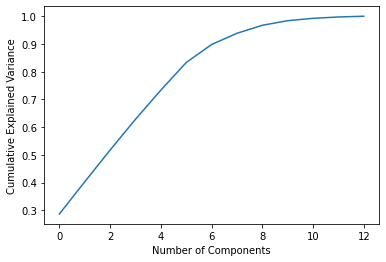

In [39]:
#plotting the graph to select n-components
pca=PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [40]:
pca=PCA(n_components = 9)
pca.fit(data)
PCA_data = pca.transform(data)
print("original shape: ", data.shape)
print("transformed shape: ", PCA_data.shape)

original shape:  (12864, 13)
transformed shape:  (12864, 9)


In [41]:
print(pca.components_)
print(pca.explained_variance_)

[[ 3.63909744e-02 -6.08178618e-02 -3.49847089e-01  8.74991628e-01
  -2.18576152e-01  8.27986932e-02  4.11777308e-02 -7.56601032e-02
  -1.74468137e-03 -8.29147283e-02 -1.83321081e-01 -1.55419982e-02
   6.47785927e-02]
 [ 5.31304711e-01  3.48052800e-01 -2.67846928e-02 -7.83451635e-02
  -4.91690424e-02  3.40760319e-02  7.42400775e-01 -1.43319274e-02
  -1.32504055e-02 -1.64665733e-02 -1.29355558e-02 -3.88752158e-03
   1.84788854e-01]
 [ 5.33495805e-01  3.22969719e-01 -7.09599098e-02 -2.29854690e-02
  -1.08979086e-01  1.00462423e-01 -3.91946343e-01 -9.55411705e-04
  -1.62232621e-02 -4.12648873e-02 -9.78087539e-02  2.33410749e-03
  -6.46822366e-01]
 [ 9.48001049e-03 -6.41655324e-01  1.56289740e-02 -8.87916267e-03
  -7.44670638e-02 -1.42386429e-01  4.46047991e-01  5.68034483e-02
   6.23391081e-03 -4.55259300e-03  3.37802718e-02  4.45450041e-03
  -5.98865805e-01]
 [ 6.09173316e-01 -5.90342899e-01  3.45963114e-02 -8.13437723e-02
  -1.65395292e-02  1.88615639e-01 -2.74869337e-01 -1.14762226e-03


In [42]:
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.9673981622440325

In [43]:
df_PCA = pd.DataFrame(PCA_data)
df_PCA['Historic']=labelencoder.fit_transform(df['Historic'])
df_PCA.head()

0         1         2         3         4         5         6  \
0 -0.238397 -0.430960  0.213911 -0.342078 -0.574433 -0.029598 -0.324095   
1 -0.127537 -0.598308  0.089859 -0.010479 -0.280108 -0.029682 -0.567864   
2 -0.237681 -0.497346  0.192622 -0.275337 -0.348562  0.460834 -0.366809   
3 -0.295191 -0.536279  0.096945 -0.106076 -0.440935 -0.256323 -0.223598   
4 -0.375551 -0.111549 -0.023621 -0.107967 -0.445635  0.786638  0.064589   

          7         8  Historic  
0  0.005263 -0.237321         1  
1  0.059113 -0.066575         1  
2  0.276006  0.016445         1  
3  0.013893  0.013968         1  
4  0.122238 -0.100922         0

In [44]:
feature_cols=[0,1,2,3,4,5,6,7,8]
X = df_PCA[feature_cols]
y = df_PCA.Historic

In [45]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### DECISION TREE IMPLEMENTATION ON PCA DATA TO CLASSIFY HOUSE INTO ['HISTORIC','CONTEMPORARY']

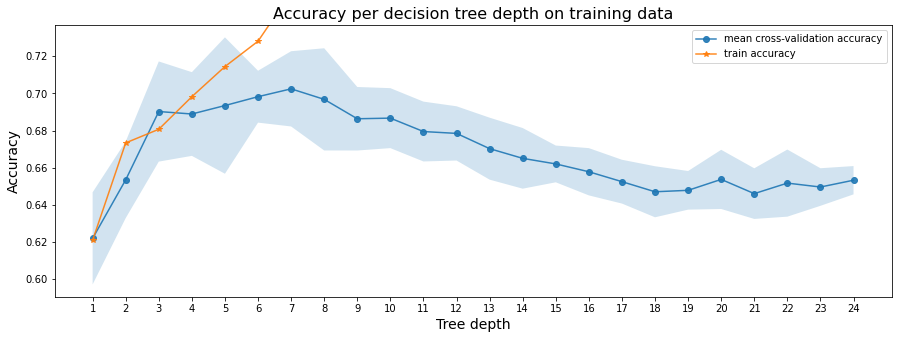

In [46]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(Xtrain, ytrain, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [47]:
# fit a classification tree with max_depth=5
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=7, random_state=12)
# Fit our training data
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=7, random_state=12)

In [48]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.7544424700133274
Testing accuracy : 0.6974093264248704


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [0.68479467 0.70921199 0.73917869 0.69922309 0.68333333 0.69444444
 0.69333333 0.69444444 0.71333333 0.67333333]
Mean Accuracy: 0.6984630657294364


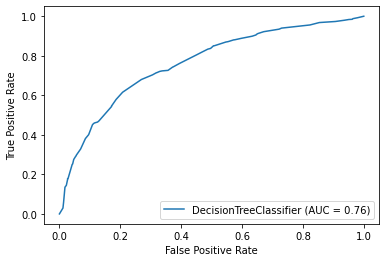

In [50]:
from sklearn import metrics
metrics.plot_roc_curve(treeclf, Xtest, ytest)  

In [51]:
from sklearn import tree
text_representation = tree.export_text(treeclf)
print(text_representation)

|--- feature_8 <= 0.04
|   |--- feature_0 <= 0.04
|   |   |--- feature_6 <= -0.12
|   |   |   |--- feature_7 <= -0.13
|   |   |   |   |--- feature_8 <= -0.14
|   |   |   |   |   |--- feature_2 <= -0.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  -0.56
|   |   |   |   |   |   |--- feature_0 <= -0.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -0.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  -0.14
|   |   |   |   |   |--- feature_3 <= -0.32
|   |   |   |   |   |   |--- feature_4 <= 0.13
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.13
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  -0.32
|   |   |   |   |   |   |--- feature_8 <= -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  -0.13
|   |   |   | 

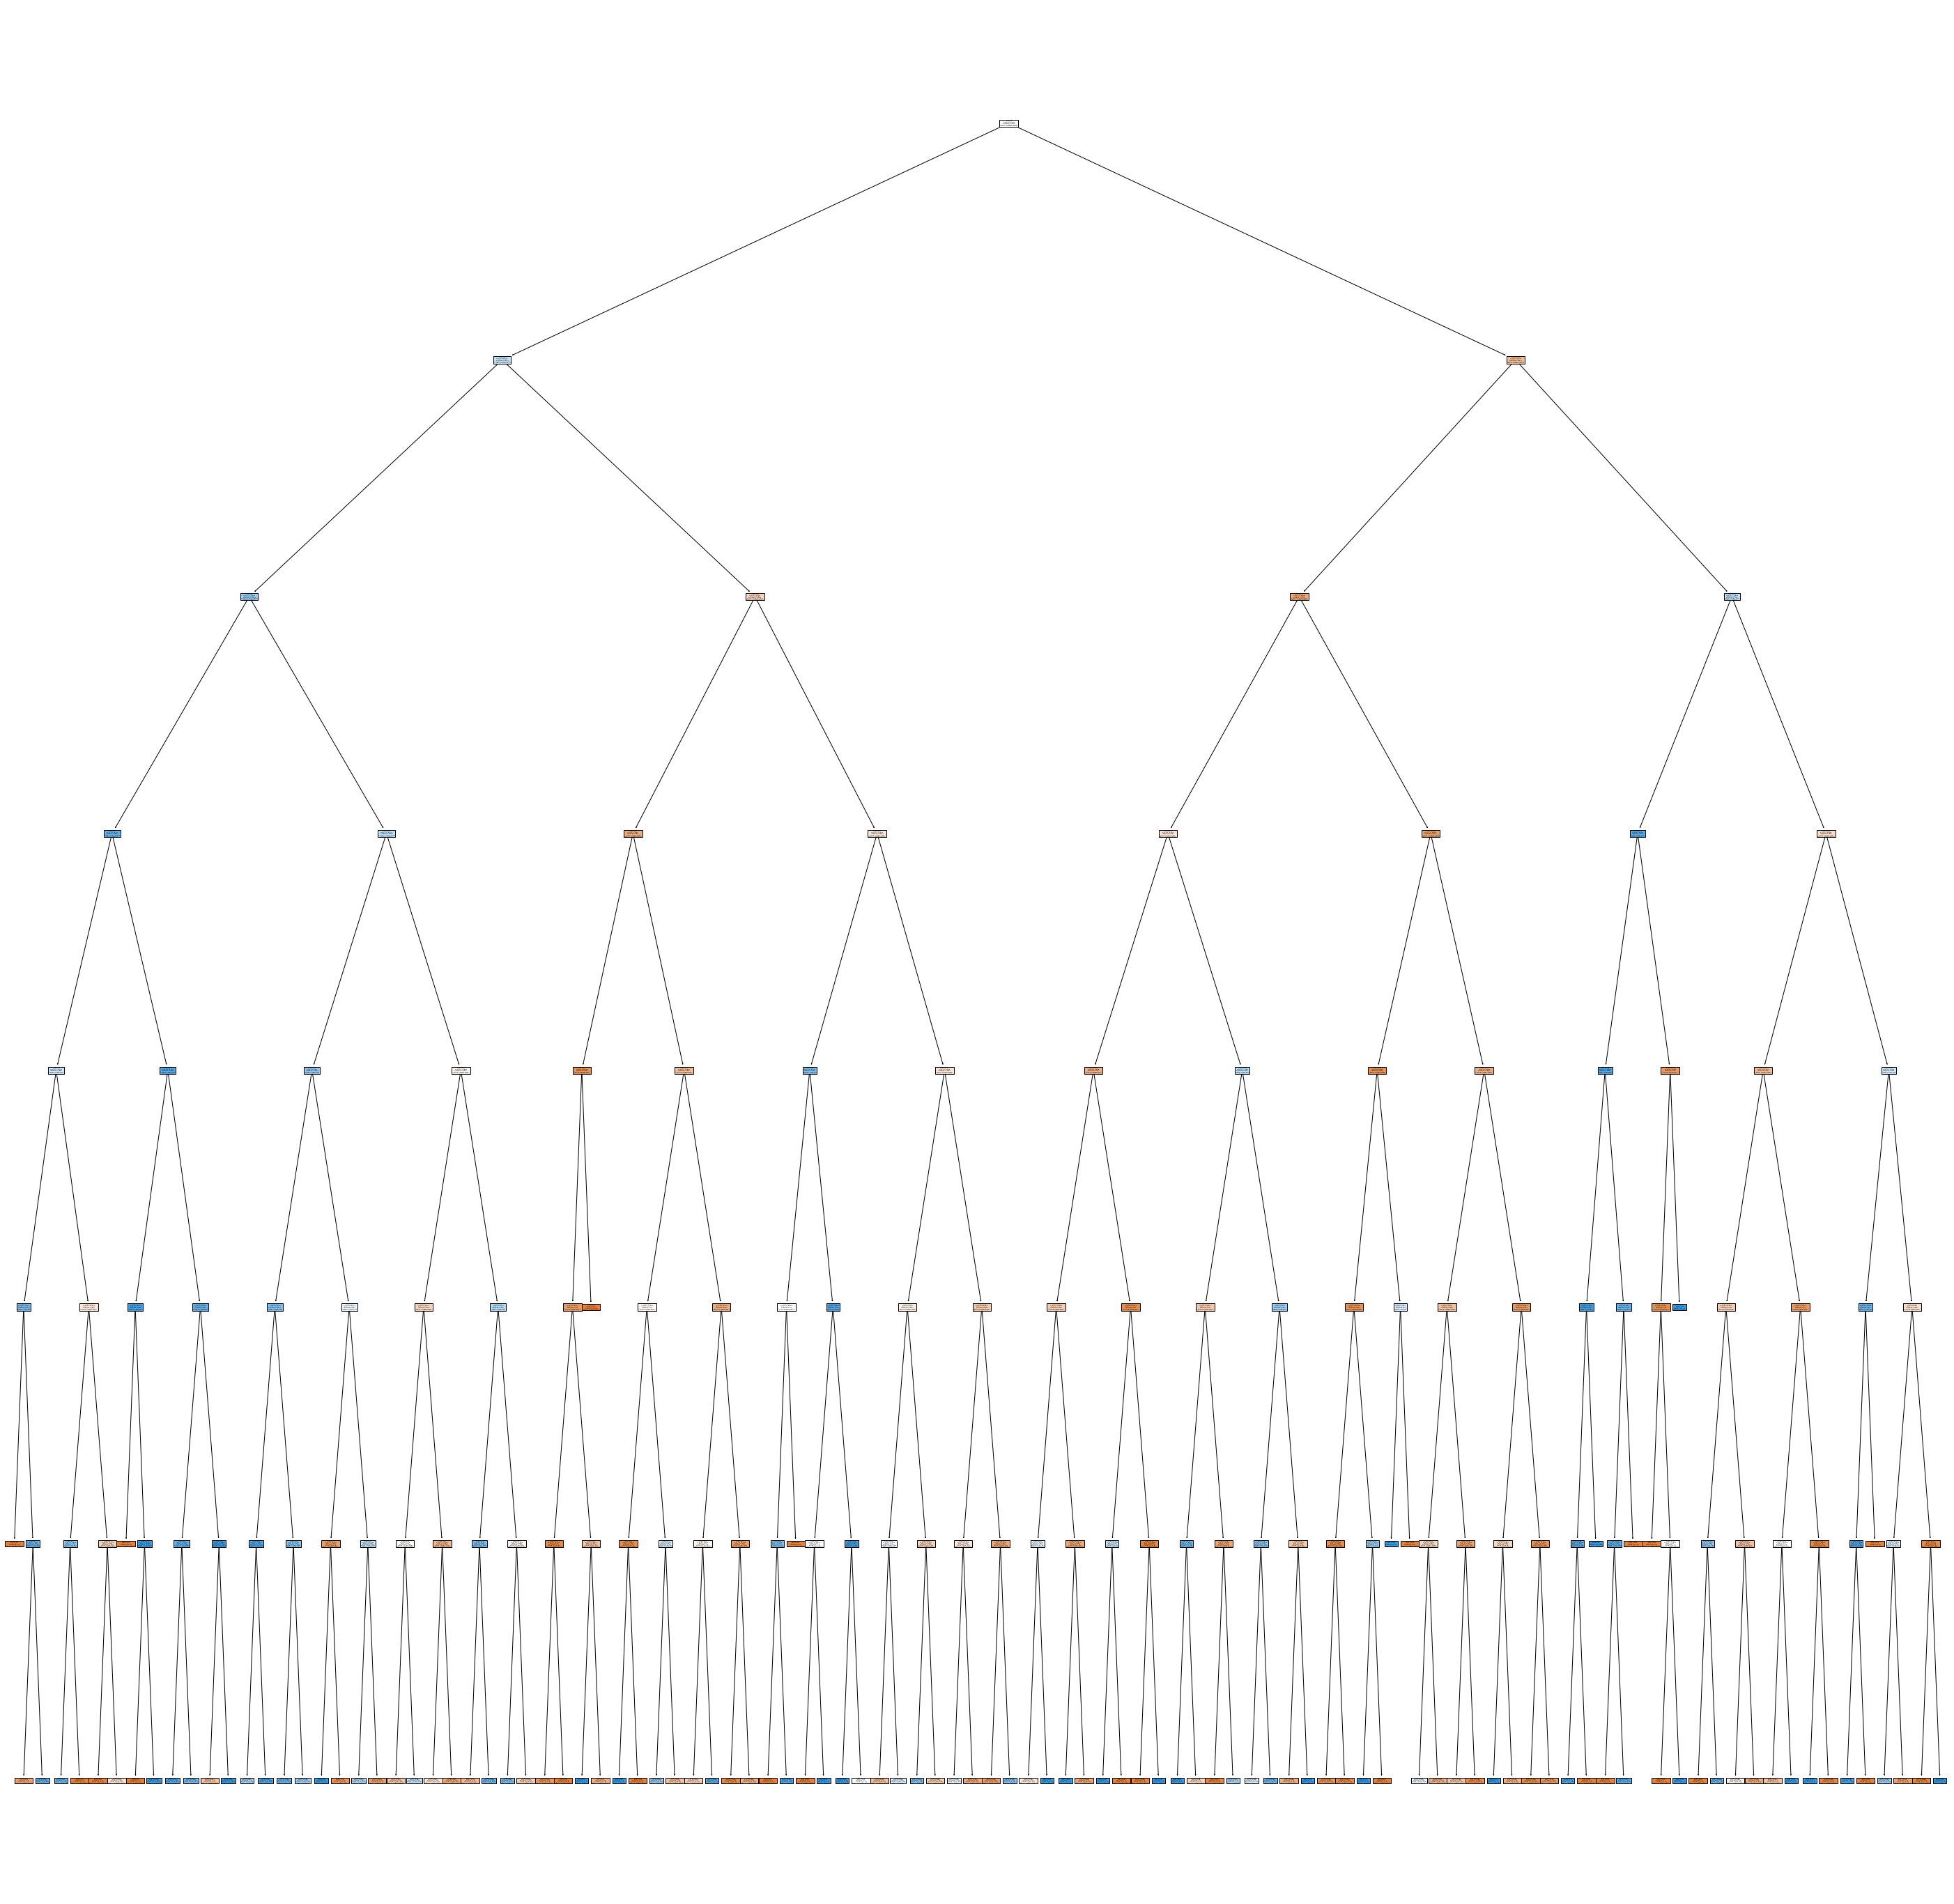

In [52]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,50))
cn=['Contemporary','Historic']
picture = tree.plot_tree(treeclf,node_ids=True,class_names=cn,filled=True)

In [53]:
treeclf.predict(np.array(Xtest)[1].reshape(1, -1))

array([1])

### LOGISTIC REGRESSION USING PCA DATA

In [54]:
from sklearn.linear_model import LogisticRegression
clf_LR_PCA = LogisticRegression()
clf_LR_PCA.fit(Xtrain,ytrain)
clf_LR_PCA.score(Xtest,ytest)

0.699740932642487

In [55]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, clf_LR_PCA.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, clf_LR_PCA.predict(Xtest))))

Training accuracy: 0.7070191026210573
Testing accuracy : 0.699740932642487


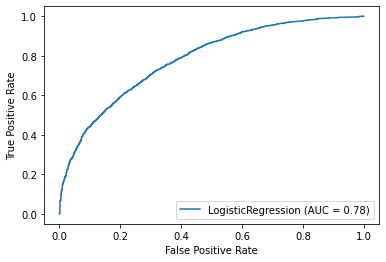

In [56]:
from sklearn import metrics
metrics.plot_roc_curve(clf_LR_PCA, Xtest, ytest)  

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_LR_PCA, Xtest, ytest, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.6992227979274611


In [58]:
clf_LR_PCA.predict(np.array(Xtest)[1].reshape(1, -1))

array([1])

# DECISION TREE TO CATEGORISE THE HOUSE BASED ON THEIR TYPE
This is multi class classification: target feature is house type which could be either:['h':house,'t':townhouse,'u':unit].

In [59]:
type_df=df
type_df=type_df.drop(columns=['Date','YearBuilt'])
type_df.head()

Suburb  Address  Rooms  Type      Price  Method  SellerG  Distance  \
0       0    12310      2     0  1480000.0       1       23       2.5   
1       0     5724      2     0  1035000.0       1       23       2.5   
2       0     9446      3     0  1465000.0       3       23       2.5   
3       0     8682      3     0   850000.0       0       23       2.5   
4       0    10193      4     0  1600000.0       4      154       2.5   

   Postcode  Bathroom  Car  Landsize  Regionname              Age  Historic  
0    3067.0       1.0  1.0     202.0           2  [[66.90705094]]         1  
1    3067.0       1.0  0.0     156.0           2            121.0         1  
2    3067.0       2.0  0.0     134.0           2            121.0         1  
3    3067.0       2.0  1.0      94.0           2  [[66.90705094]]         1  
4    3067.0       1.0  2.0     120.0           2              7.0         0

In [60]:
type_df=type_df.drop(columns=['Age'])
type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      12864 non-null  int64  
 1   Address     12864 non-null  int64  
 2   Rooms       12864 non-null  int64  
 3   Type        12864 non-null  int64  
 4   Price       12864 non-null  float64
 5   Method      12864 non-null  int64  
 6   SellerG     12864 non-null  int64  
 7   Distance    12864 non-null  float64
 8   Postcode    12864 non-null  float64
 9   Bathroom    12864 non-null  float64
 10  Car         12864 non-null  float64
 11  Landsize    12864 non-null  float64
 12  Regionname  12864 non-null  int64  
 13  Historic    12864 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.4 MB


In [61]:
l=[]
for i in type_df:
    if i != 'Type':
        l.append(i)
print(type_df['Type'].unique())
print(type_df['Historic'].unique())
print(type_df.info())
feature_cols=l
X = type_df[feature_cols]
y = type_df.Type

[0 2 1]
[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      12864 non-null  int64  
 1   Address     12864 non-null  int64  
 2   Rooms       12864 non-null  int64  
 3   Type        12864 non-null  int64  
 4   Price       12864 non-null  float64
 5   Method      12864 non-null  int64  
 6   SellerG     12864 non-null  int64  
 7   Distance    12864 non-null  float64
 8   Postcode    12864 non-null  float64
 9   Bathroom    12864 non-null  float64
 10  Car         12864 non-null  float64
 11  Landsize    12864 non-null  float64
 12  Regionname  12864 non-null  int64  
 13  Historic    12864 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.4 MB
None


In [62]:
X.info()
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X_new = pd.DataFrame(SelectKBest(chi2, k=5).fit_transform(X, y))
X_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      12864 non-null  int64  
 1   Address     12864 non-null  int64  
 2   Rooms       12864 non-null  int64  
 3   Price       12864 non-null  float64
 4   Method      12864 non-null  int64  
 5   SellerG     12864 non-null  int64  
 6   Distance    12864 non-null  float64
 7   Postcode    12864 non-null  float64
 8   Bathroom    12864 non-null  float64
 9   Car         12864 non-null  float64
 10  Landsize    12864 non-null  float64
 11  Regionname  12864 non-null  int64  
 12  Historic    12864 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 1.3 MB


0        1          2    3      4
0  0.0  12310.0  1480000.0  2.5  202.0
1  0.0   5724.0  1035000.0  2.5  156.0
2  0.0   9446.0  1465000.0  2.5  134.0
3  0.0   8682.0   850000.0  2.5   94.0
4  0.0  10193.0  1600000.0  2.5  120.0

In [63]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Find the best depth of the decision tree.

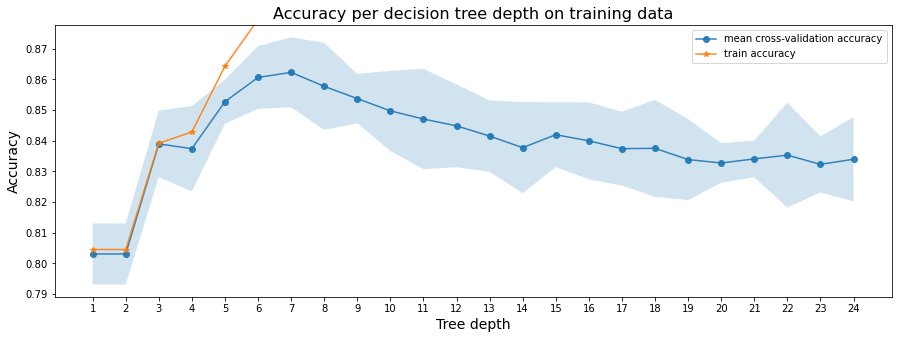

In [64]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(Xtrain, ytrain, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


### TRAINING AND TESTING THE MODEL

In [65]:
#training the model with max depth being 6.
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=6, random_state=1)
# Fit our training data
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=6, random_state=1)

### EVALUATION OF THE MODEL

In [66]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8794980008884941
Testing accuracy : 0.855699481865285


In [69]:
from sklearn import tree
text_representation = tree.export_text(treeclf)
print(text_representation)

|--- feature_10 <= 0.01
|   |--- feature_2 <= 0.38
|   |   |--- feature_10 <= 0.00
|   |   |   |--- feature_3 <= 0.19
|   |   |   |   |--- feature_6 <= 0.16
|   |   |   |   |   |--- feature_3 <= 0.08
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  0.08
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_6 >  0.16
|   |   |   |   |   |--- feature_3 <= 0.14
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  0.14
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.19
|   |   |   |   |--- feature_7 <= 0.09
|   |   |   |   |   |--- feature_6 <= 0.07
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_6 >  0.07
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_7 >  0.09
|   |   |   |   |   |--- feature_6 <= 0.20
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_6 >  0.20
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_10 >  0.00
|   |   |  

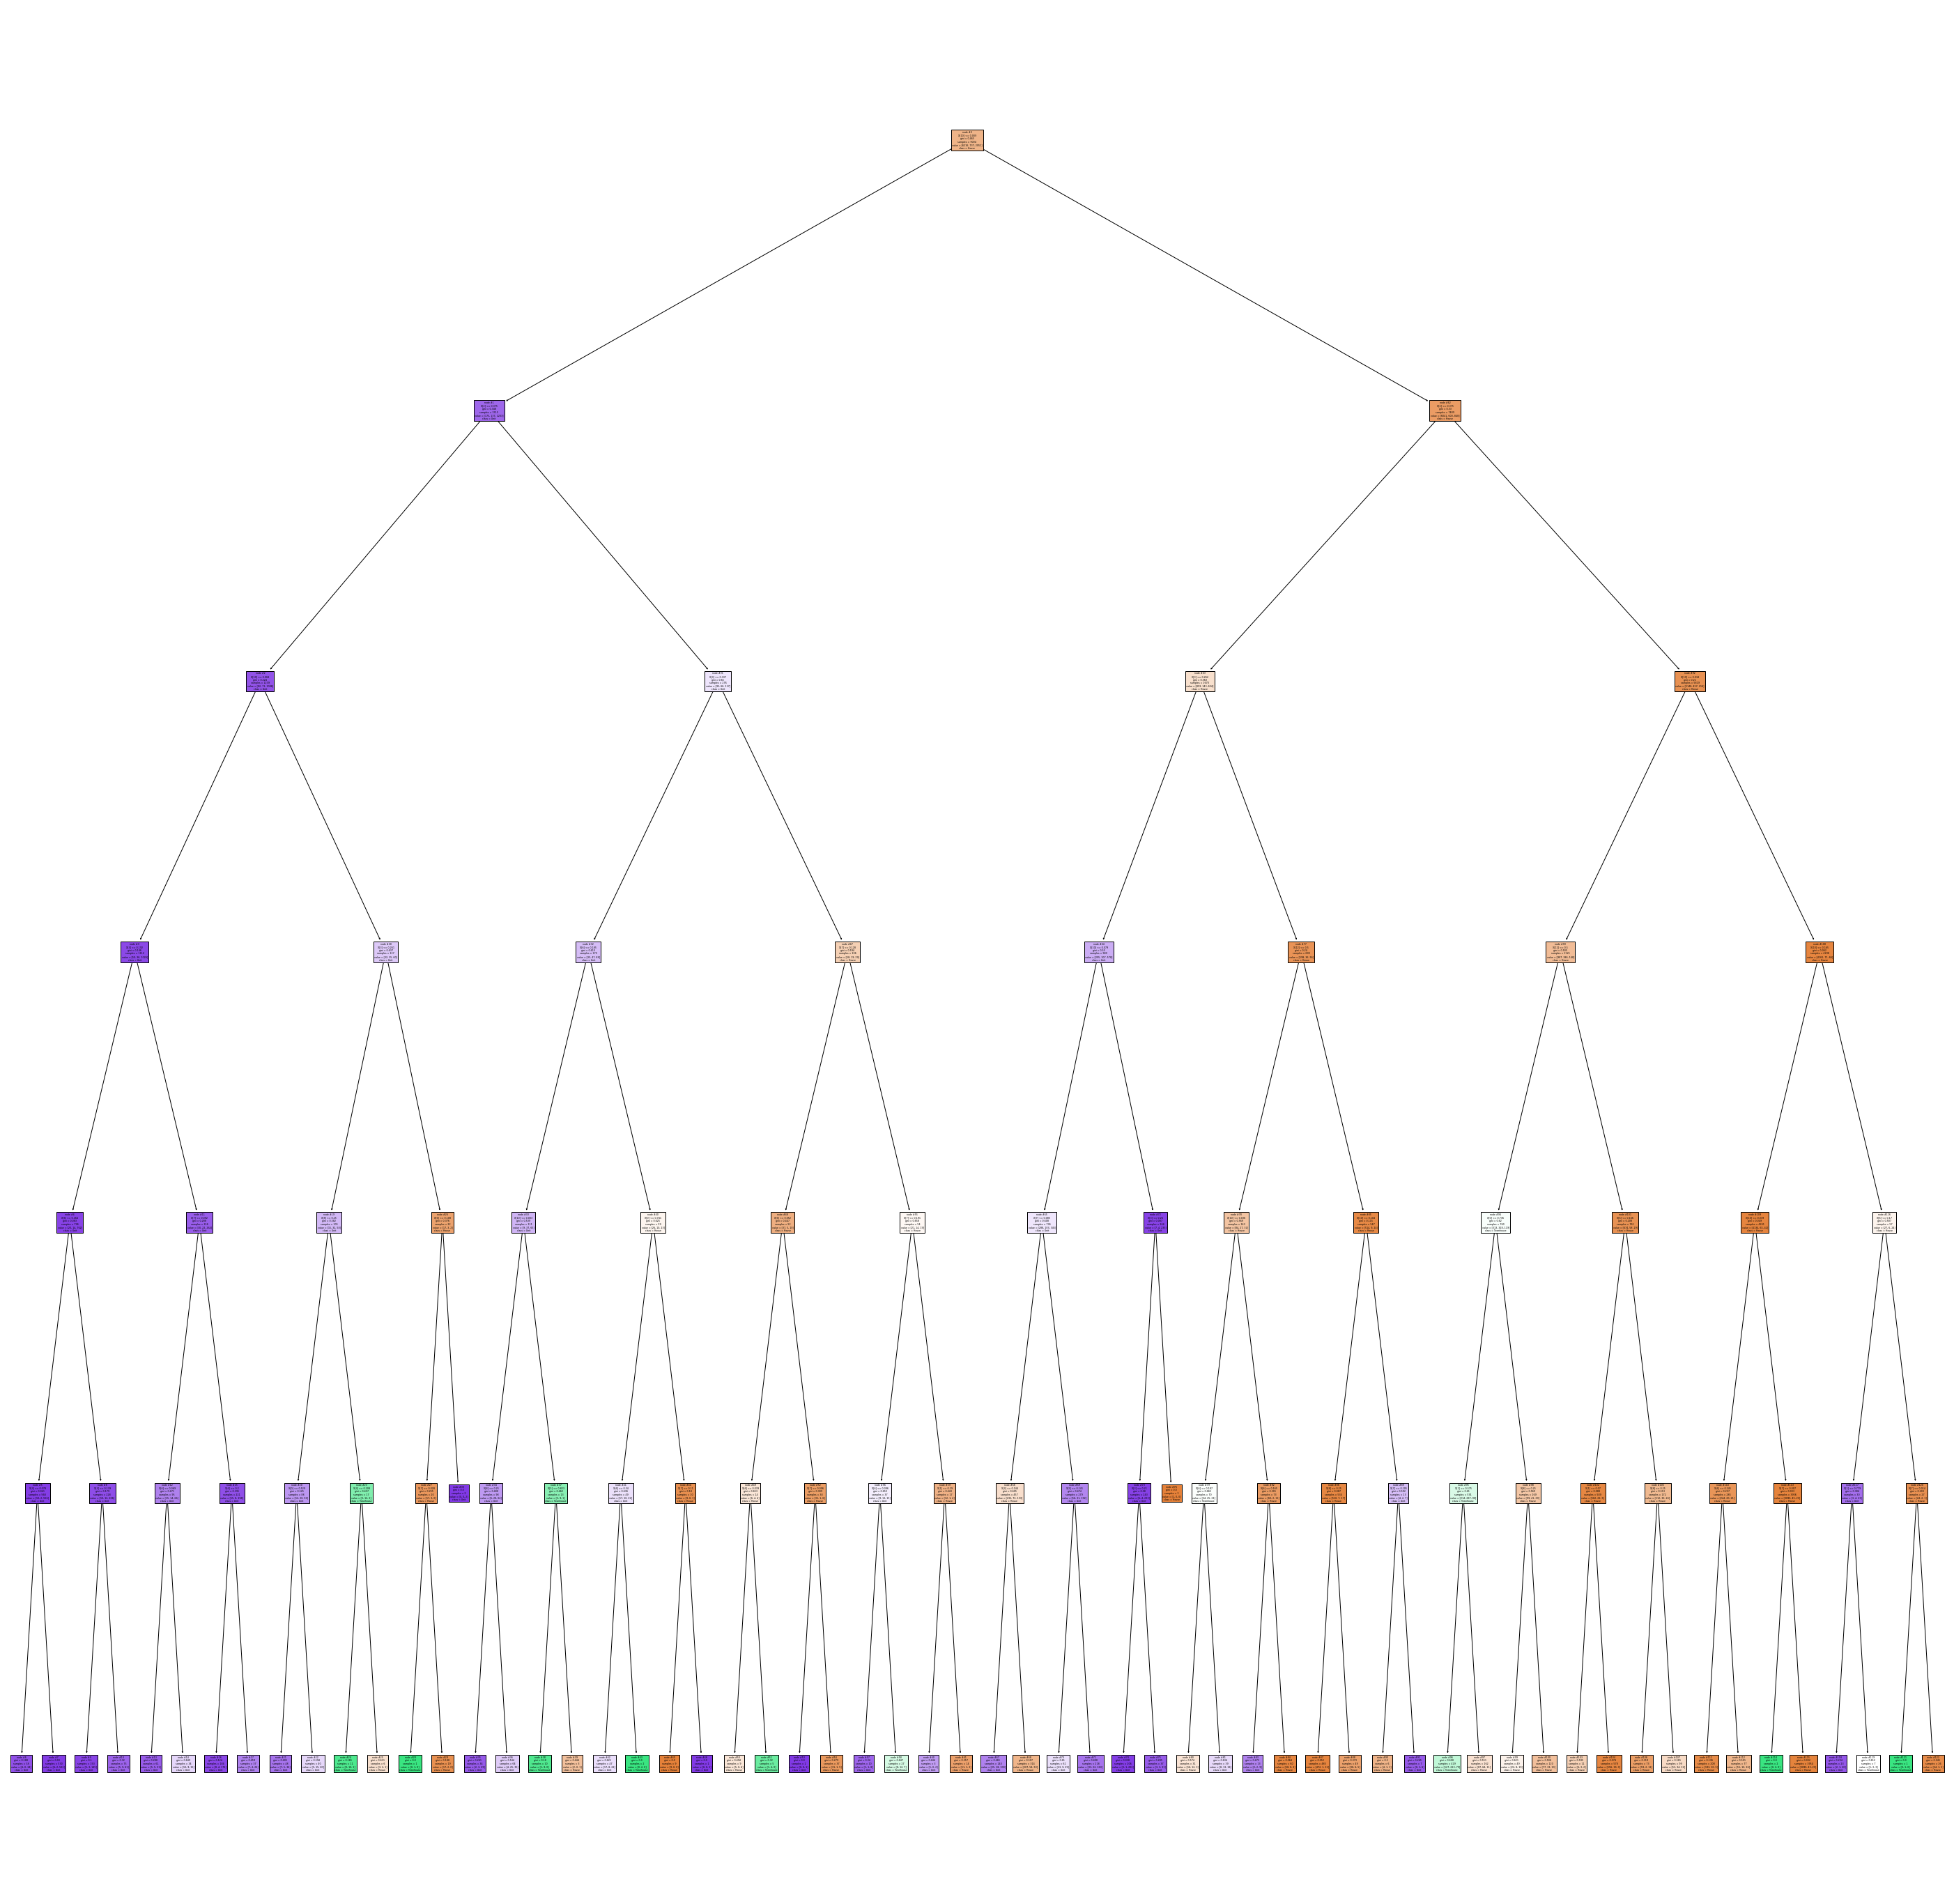

In [70]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,50))
cn=['House','Townhouse','Unit']
picture = tree.plot_tree(treeclf,node_ids=True,class_names=cn,filled=True)

In [71]:
treeclf.predict(np.array(Xtest)[1].reshape(1, -1))

array([0])

# LOGISTIC REGRESSION TO CATEGORISE HOUSES BASED ON THEIR TYPES
This is multi class classification: target feature is house type which could be either:['h':house,'t':townhouse,'u':unit].

### TRAINING AND TESTING THE MODEL

In [72]:
from sklearn.linear_model import LogisticRegression
LR_PCA = LogisticRegression()
LR_PCA.fit(Xtrain,ytrain)
LR_PCA.score(Xtest,ytest)

0.8318652849740933

### EVALUATION OF THE MODEL

In [73]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, LR_PCA.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, LR_PCA.predict(Xtest))))

Training accuracy: 0.8385162150155486
Testing accuracy : 0.8318652849740933


In [74]:
LR_PCA.predict(np.array(Xtest)[1].reshape(1, -1))

array([0])

# NAIVE BAYES ALGORITHM TO CATEGORISE HOUSES BASED ON THEIR TYPES
This is multi class classification: target feature is house type which could be either:['h':house,'t':townhouse,'u':unit].

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain,ytrain)
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, gnb.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, gnb.predict(Xtest))))

Training accuracy: 0.8218569524655709
Testing accuracy : 0.8183937823834196


In [76]:
gnb.predict(np.array(Xtest)[1].reshape(1, -1))

array([0])

# SVM ALGORITHM TO CATEGORISE HOUSES BASED ON THEIR TYPES
This is multi class classification: target feature is house type which could be either:['h':house,'t':townhouse,'u':unit].

In [77]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf.fit(Xtrain,ytrain)

SVC(C=1, kernel='linear')

In [78]:
from sklearn.metrics import accuracy_score
print("Training accuracy: {}".format(accuracy_score(ytrain, clf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, clf.predict(Xtest))))

Training accuracy: 0.8371834740115505
Testing accuracy : 0.833678756476684


In [79]:
clf.predict(np.array(Xtest)[1].reshape(1, -1))

array([0])

# REGRESSION PROBLEMS AS IDENTIFIED:
The price feature is the target feature for this experiment, regression models are built with continuous feature being the target feature, thus the problem statement would be:
Predict the house price of the house given various features?

## Multiple Linear Regression
In Multiple regression, there is just one dependent variable i.e. y. But, the predictor variables or parameters are multiple. As in our case the dependent variable is 'Price', whereas various parameters are utilised to come up with the results.

### Selecting data features and data

In [80]:

data=df
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=4).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
display(data.shape)
# Drop correlated features 
for i in to_drop:
    data = data.drop(i, axis=1)
data.shape

(12864, 17)

(12864, 17)

### LABEL ENCODING:

In [81]:
from sklearn.preprocessing import LabelEncoder 
#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 
#fitting and transforming the desired categorical column.
data['Suburb'] = labelencoder.fit_transform(data['Suburb'])
data['Address'] = labelencoder.fit_transform(data['Address'])
data['Type'] = labelencoder.fit_transform(data['Type']) 
data['Method'] = labelencoder.fit_transform(data['Method']) 
data['Regionname'] = labelencoder.fit_transform(data['Regionname'])
data['SellerG'] = labelencoder.fit_transform(data['SellerG'])
data=data.drop(columns=['YearBuilt','Date','Age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      12864 non-null  int64  
 1   Address     12864 non-null  int64  
 2   Rooms       12864 non-null  int64  
 3   Type        12864 non-null  int64  
 4   Price       12864 non-null  float64
 5   Method      12864 non-null  int64  
 6   SellerG     12864 non-null  int64  
 7   Distance    12864 non-null  float64
 8   Postcode    12864 non-null  float64
 9   Bathroom    12864 non-null  float64
 10  Car         12864 non-null  float64
 11  Landsize    12864 non-null  float64
 12  Regionname  12864 non-null  int64  
 13  Historic    12864 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.4 MB


### FEATURE SELECTION:
As seen in the situation above none of the features correlate closely, thus all of the features are needed as input variables to predict the output.

In [82]:
feature_cols=['Suburb', 'Address', 'Rooms', 'Type', 'Method',
       'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Regionname','Historic']
X = data[feature_cols]
y = data.Price
print(type(X))
print(X.shape)
print(type(y))

<class 'pandas.core.frame.DataFrame'>
(12864, 13)
<class 'pandas.core.series.Series'>


In [83]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)

# Feature Scaling using Normalization
Formula: x'=(x-min(x))/(max(x)-min(x))

In [84]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit((Xtrain))
# transform training data
X_train_norm = norm.transform((Xtrain))
# transform testing data
X_test_norm = norm.transform((Xtest))

### Training and Testing ML model

In [85]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
#fit the model using our data
my_model.fit(X_train_norm, ytrain)

LinearRegression()

In [86]:
ypredicts = my_model.predict(X_test_norm)
print("The predicted sales:")
print(ypredicts)


The predicted sales:
[1298620.51078909 1443673.75765347  715804.02728344 ... 1214502.37421448
  532520.82054878  854341.436663  ]


### EVALUATION OF THE MODEL

In [87]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(ytest,ypredicts))
print('MSE:',metrics.mean_squared_error(ytest,ypredicts))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,ypredicts)))
print('R^2 =',metrics.explained_variance_score(ytest,ypredicts))

MAE: 253588.513659183
MSE: 115356608949.59808
RMSE: 339641.8833854242
R^2 = 0.5669466028126404


In [88]:
ypredicts= pd.DataFrame(ypredicts)
ypredicts.describe()

0
count  5.146000e+03
mean   1.016710e+06
std    3.876453e+05
min   -2.486666e+05
25%    7.451966e+05
50%    1.026168e+06
75%    1.285847e+06
max    2.318012e+06

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.54423913, 0.55375702, 0.57360608, 0.55494928, 0.53211775])

In [90]:
np.average(regressor)

0.5517338515220842

Text(0, 0.5, 'Predicted values')

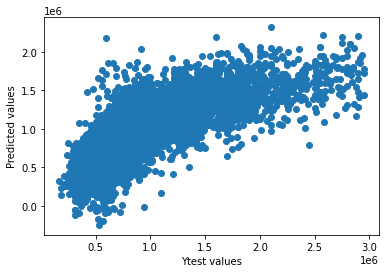

In [93]:
# Actual v predictions scatter
plt.scatter(ytest, ypredicts)
plt.xlabel("Ytest values")
plt.ylabel("Predicted values")

In [94]:
my_model.predict(np.array(Xtest)[1].reshape(1, -1))

array([5.01679485e+09])

### Training and Testing ML model without feature scaling

In [95]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
#fit the model using our data
print(Xtrain.shape)
my_model.fit(Xtrain, ytrain)


(7718, 13)


LinearRegression()

In [96]:
ypredicts = my_model.predict(Xtest)
print(type(ypredicts))
print(ypredicts.shape)
print(type(ytest))
ytest=np.array(ytest)
print(type(ytest))
print(ytest.shape)


<class 'numpy.ndarray'>
(5146,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(5146,)


In [97]:
j=(ypredicts-ytest)
mse = np.mean(j ** 2)
print("MSE: {}".format(mse))

MSE: 115356608949.59808


In [98]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 score : %.2f" % r2_score(ytest,ypredicts))

R2 score : 0.57


# RANDOM FOREST REGRESSOR

In [99]:
# determine which model to use
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(criterion = 'mse', n_jobs = 1, n_estimators = 100,  min_samples_leaf = 1, random_state = 3)
RF.fit(Xtrain, ytrain)
y_pred = RF.predict(Xtest)

# Display.
print('Random Forest Regressor')
print('\nR-squared training set:')
print(RF.score(Xtrain, ytrain))

print('\nR-squared test set:')
print(RF.score(Xtest, ytest))
importances = pd.DataFrame({'feature':Xtrain.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

Random Forest Regressor

R-squared training set:
0.9711022532948411

R-squared test set:
0.7866183552030603


importance
feature               
Distance         0.253
Type             0.192
Postcode         0.187
Landsize         0.120
Rooms            0.090
Address          0.038
Bathroom         0.035
Suburb           0.029
SellerG          0.023
Car              0.013
Method           0.011
Historic         0.006
Regionname       0.003

# GRADIENT BOOST REGRESSOR

In [100]:
from sklearn import ensemble
params = {'n_estimators': 100,
          'max_depth': 10,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
y_pred = reg.fit(Xtrain, ytrain)
from sklearn.metrics import r2_score
print("Testing accuracy :" , (reg.score(Xtest,ytest).round(5))*100 ,"%")
print("Training accuracy :", (reg.score(Xtrain,ytrain).round(5))*100, "%")

Testing accuracy : 66.633 %
Training accuracy : 77.45 %


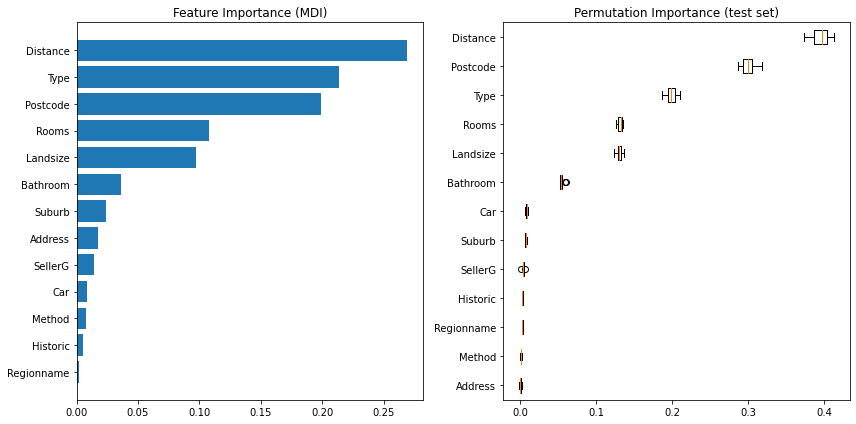

In [101]:
from sklearn.inspection import permutation_importance
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(Xtest.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, Xtest, ytest, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(Xtest.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


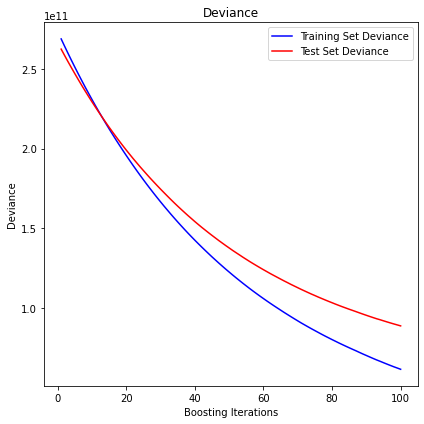

In [102]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(Xtest)):
    test_score[i] = reg.loss_(ytest, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# ANN Regression
Similarly, ANN learns from the training data. There are several types of ANN models and the one we focused on is the feedforward neural network (information travels only in one direction). The entire process for prediction using this ANN model is- 

There is a mandatory input layer of neurons and output layer of neurons, and several hidden layers in between them.  

Hidden layers process the data for the output layer to predict the object identity. Each layer will detect a specific class of features. 

Number of neurons assigned to the layers is depended on the dataset involved.  

A weight is assigned to connections (also called edges) between each neuron. At the beginning, the weight is just a random number which changes as the ANN keeps training itself to adjust and find the right weights. If training data is being fed, the weights will be adjusted and gradually the inputs will map into correct outputs.  

An activation function is present which depicts the internal state of a neuron. The function the input signal of a node to an output signal. Rectified linear activation function (ReLU) is most used activation function that has been used in our ANN model. 

We are predicting house prices using all the important feature columns in our Melbourne housing dataset. 

In [103]:
from  tensorflow.keras.callbacks import ModelCheckpoint
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense, Activation, Flatten

In [104]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = Xtrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________


In [105]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(Xtrain, ytrain, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
193/193 [==============================] - 1s 3ms/step - loss: 725865.2932 - mean_absolute_error: 725865.2932 - val_loss: 399760.3438 - val_mean_absolute_error: 399760.3438

Epoch 00001: val_loss improved from inf to 399760.34375, saving model to Weights-001--399760.34375.hdf5
Epoch 2/500
193/193 [==============================] - 0s 1ms/step - loss: 384747.2355 - mean_absolute_error: 384747.2355 - val_loss: 395010.1250 - val_mean_absolute_error: 395010.1250

Epoch 00002: val_loss improved from 399760.34375 to 395010.12500, saving model to Weights-002--395010.12500.hdf5
Epoch 3/500
193/193 [==============================] - 0s 2ms/step - loss: 388546.5221 - mean_absolute_error: 388546.5221 - val_loss: 379580.0312 - val_mean_absolute_error: 379580.0312

Epoch 00003: val_loss improved from 395010.12500 to 379580.03125, saving model to Weights-003--379580.03125.hdf5
Epoch 4/500
193/193 [==============================] - 0s 1ms/step - loss: 373000.4774 - mean_absolute_error: 37


Epoch 00030: val_loss did not improve from 273035.28125
Epoch 31/500
193/193 [==============================] - 0s 1ms/step - loss: 268986.9249 - mean_absolute_error: 268986.9249 - val_loss: 270960.1250 - val_mean_absolute_error: 270960.1250

Epoch 00031: val_loss improved from 273035.28125 to 270960.12500, saving model to Weights-031--270960.12500.hdf5
Epoch 32/500
193/193 [==============================] - 0s 1ms/step - loss: 275767.7379 - mean_absolute_error: 275767.7379 - val_loss: 267393.1875 - val_mean_absolute_error: 267393.1875

Epoch 00032: val_loss improved from 270960.12500 to 267393.18750, saving model to Weights-032--267393.18750.hdf5
Epoch 33/500
193/193 [==============================] - 0s 1ms/step - loss: 286197.1343 - mean_absolute_error: 286197.1343 - val_loss: 274321.0625 - val_mean_absolute_error: 274321.0625

Epoch 00033: val_loss did not improve from 267393.18750
Epoch 34/500
193/193 [==============================] - 0s 1ms/step - loss: 266774.1629 - mean_absol

193/193 [==============================] - 0s 1ms/step - loss: 257050.4467 - mean_absolute_error: 257050.4467 - val_loss: 258290.3906 - val_mean_absolute_error: 258290.3906

Epoch 00063: val_loss did not improve from 257206.09375
Epoch 64/500
193/193 [==============================] - 0s 1ms/step - loss: 257128.9852 - mean_absolute_error: 257128.9852 - val_loss: 284264.3438 - val_mean_absolute_error: 284264.3438

Epoch 00064: val_loss did not improve from 257206.09375
Epoch 65/500
193/193 [==============================] - 0s 1ms/step - loss: 265843.5050 - mean_absolute_error: 265843.5050 - val_loss: 253882.4688 - val_mean_absolute_error: 253882.4688

Epoch 00065: val_loss improved from 257206.09375 to 253882.46875, saving model to Weights-065--253882.46875.hdf5
Epoch 66/500
193/193 [==============================] - 0s 2ms/step - loss: 261101.2969 - mean_absolute_error: 261101.2969 - val_loss: 269559.1250 - val_mean_absolute_error: 269559.1250

Epoch 00066: val_loss did not improve fr


Epoch 00096: val_loss did not improve from 253882.46875
Epoch 97/500
193/193 [==============================] - 0s 1ms/step - loss: 248251.9532 - mean_absolute_error: 248251.9532 - val_loss: 263059.8125 - val_mean_absolute_error: 263059.8125

Epoch 00097: val_loss did not improve from 253882.46875
Epoch 98/500
193/193 [==============================] - 0s 1ms/step - loss: 256523.7653 - mean_absolute_error: 256523.7653 - val_loss: 304276.0938 - val_mean_absolute_error: 304276.0938

Epoch 00098: val_loss did not improve from 253882.46875
Epoch 99/500
193/193 [==============================] - 0s 1ms/step - loss: 264629.8040 - mean_absolute_error: 264629.8040 - val_loss: 254312.9688 - val_mean_absolute_error: 254312.9688

Epoch 00099: val_loss did not improve from 253882.46875
Epoch 100/500
193/193 [==============================] - 0s 1ms/step - loss: 264492.2175 - mean_absolute_error: 264492.2175 - val_loss: 256156.0625 - val_mean_absolute_error: 256156.0625

Epoch 00100: val_loss did 


Epoch 00129: val_loss did not improve from 251342.21875
Epoch 130/500
193/193 [==============================] - 0s 1ms/step - loss: 256417.2186 - mean_absolute_error: 256417.2186 - val_loss: 259237.4688 - val_mean_absolute_error: 259237.4688

Epoch 00130: val_loss did not improve from 251342.21875
Epoch 131/500
193/193 [==============================] - 0s 1ms/step - loss: 250566.4178 - mean_absolute_error: 250566.4178 - val_loss: 261372.3750 - val_mean_absolute_error: 261372.3750

Epoch 00131: val_loss did not improve from 251342.21875
Epoch 132/500
193/193 [==============================] - 0s 1ms/step - loss: 251064.9903 - mean_absolute_error: 251064.9903 - val_loss: 259876.1406 - val_mean_absolute_error: 259876.1406

Epoch 00132: val_loss did not improve from 251342.21875
Epoch 133/500
193/193 [==============================] - 0s 1ms/step - loss: 257976.7111 - mean_absolute_error: 257976.7111 - val_loss: 255297.2500 - val_mean_absolute_error: 255297.2500

Epoch 00133: val_loss d

193/193 [==============================] - 0s 1ms/step - loss: 247978.4319 - mean_absolute_error: 247978.4319 - val_loss: 259263.6250 - val_mean_absolute_error: 259263.6250

Epoch 00163: val_loss did not improve from 250367.54688
Epoch 164/500
193/193 [==============================] - 0s 1ms/step - loss: 249769.9661 - mean_absolute_error: 249769.9661 - val_loss: 261817.7656 - val_mean_absolute_error: 261817.7656

Epoch 00164: val_loss did not improve from 250367.54688
Epoch 165/500
193/193 [==============================] - 0s 1ms/step - loss: 246156.2204 - mean_absolute_error: 246156.2204 - val_loss: 261230.2344 - val_mean_absolute_error: 261230.2344

Epoch 00165: val_loss did not improve from 250367.54688
Epoch 166/500
193/193 [==============================] - 0s 1ms/step - loss: 261858.4569 - mean_absolute_error: 261858.4569 - val_loss: 254714.9688 - val_mean_absolute_error: 254714.9688

Epoch 00166: val_loss did not improve from 250367.54688
Epoch 167/500
193/193 [===============

193/193 [==============================] - 0s 1ms/step - loss: 249153.5777 - mean_absolute_error: 249153.5777 - val_loss: 250119.1719 - val_mean_absolute_error: 250119.1719

Epoch 00196: val_loss did not improve from 249806.84375
Epoch 197/500
193/193 [==============================] - 0s 1ms/step - loss: 254950.5585 - mean_absolute_error: 254950.5585 - val_loss: 252181.2031 - val_mean_absolute_error: 252181.2031

Epoch 00197: val_loss did not improve from 249806.84375
Epoch 198/500
193/193 [==============================] - 0s 1ms/step - loss: 246772.9151 - mean_absolute_error: 246772.9151 - val_loss: 256280.0781 - val_mean_absolute_error: 256280.0781

Epoch 00198: val_loss did not improve from 249806.84375
Epoch 199/500
193/193 [==============================] - 0s 2ms/step - loss: 253914.3893 - mean_absolute_error: 253914.3893 - val_loss: 252846.3594 - val_mean_absolute_error: 252846.3594

Epoch 00199: val_loss did not improve from 249806.84375
Epoch 200/500
193/193 [===============

193/193 [==============================] - 0s 2ms/step - loss: 260274.9319 - mean_absolute_error: 260274.9319 - val_loss: 248784.9688 - val_mean_absolute_error: 248784.9688

Epoch 00229: val_loss did not improve from 245426.93750
Epoch 230/500
193/193 [==============================] - 0s 2ms/step - loss: 243131.0801 - mean_absolute_error: 243131.0801 - val_loss: 253948.8281 - val_mean_absolute_error: 253948.8281

Epoch 00230: val_loss did not improve from 245426.93750
Epoch 231/500
193/193 [==============================] - 0s 1ms/step - loss: 250149.6181 - mean_absolute_error: 250149.6181 - val_loss: 255595.2188 - val_mean_absolute_error: 255595.2188

Epoch 00231: val_loss did not improve from 245426.93750
Epoch 232/500
193/193 [==============================] - 0s 1ms/step - loss: 244975.3082 - mean_absolute_error: 244975.3082 - val_loss: 245328.7188 - val_mean_absolute_error: 245328.7188

Epoch 00232: val_loss improved from 245426.93750 to 245328.71875, saving model to Weights-232-

193/193 [==============================] - 0s 1ms/step - loss: 237599.2008 - mean_absolute_error: 237599.2008 - val_loss: 246040.1719 - val_mean_absolute_error: 246040.1719

Epoch 00262: val_loss did not improve from 244342.07812
Epoch 263/500
193/193 [==============================] - 0s 1ms/step - loss: 236133.3152 - mean_absolute_error: 236133.3152 - val_loss: 256784.6406 - val_mean_absolute_error: 256784.6406

Epoch 00263: val_loss did not improve from 244342.07812
Epoch 264/500
193/193 [==============================] - 0s 1ms/step - loss: 241447.1136 - mean_absolute_error: 241447.1136 - val_loss: 246200.7188 - val_mean_absolute_error: 246200.7188

Epoch 00264: val_loss did not improve from 244342.07812
Epoch 265/500
193/193 [==============================] - 0s 1ms/step - loss: 247917.8525 - mean_absolute_error: 247917.8525 - val_loss: 248784.5156 - val_mean_absolute_error: 248784.5156

Epoch 00265: val_loss did not improve from 244342.07812
Epoch 266/500
193/193 [===============

193/193 [==============================] - 0s 1ms/step - loss: 239107.7898 - mean_absolute_error: 239107.7898 - val_loss: 247154.5000 - val_mean_absolute_error: 247154.5000

Epoch 00295: val_loss did not improve from 241447.50000
Epoch 296/500
193/193 [==============================] - 0s 1ms/step - loss: 238424.3690 - mean_absolute_error: 238424.3690 - val_loss: 248614.1406 - val_mean_absolute_error: 248614.1406

Epoch 00296: val_loss did not improve from 241447.50000
Epoch 297/500
193/193 [==============================] - 0s 1ms/step - loss: 242667.3249 - mean_absolute_error: 242667.3249 - val_loss: 242605.6094 - val_mean_absolute_error: 242605.6094

Epoch 00297: val_loss did not improve from 241447.50000
Epoch 298/500
193/193 [==============================] - 0s 1ms/step - loss: 242807.4572 - mean_absolute_error: 242807.4572 - val_loss: 244151.9375 - val_mean_absolute_error: 244151.9375

Epoch 00298: val_loss did not improve from 241447.50000
Epoch 299/500
193/193 [===============

193/193 [==============================] - 0s 2ms/step - loss: 235682.9409 - mean_absolute_error: 235682.9409 - val_loss: 253076.3906 - val_mean_absolute_error: 253076.3906

Epoch 00328: val_loss did not improve from 241256.90625
Epoch 329/500
193/193 [==============================] - 0s 2ms/step - loss: 242865.1736 - mean_absolute_error: 242865.1736 - val_loss: 257016.6406 - val_mean_absolute_error: 257016.6406

Epoch 00329: val_loss did not improve from 241256.90625
Epoch 330/500
193/193 [==============================] - 0s 1ms/step - loss: 238116.0852 - mean_absolute_error: 238116.0852 - val_loss: 245236.3281 - val_mean_absolute_error: 245236.3281

Epoch 00330: val_loss did not improve from 241256.90625
Epoch 331/500
193/193 [==============================] - 0s 2ms/step - loss: 234639.5098 - mean_absolute_error: 234639.5098 - val_loss: 246619.2344 - val_mean_absolute_error: 246619.2344

Epoch 00331: val_loss did not improve from 241256.90625
Epoch 332/500
193/193 [===============

193/193 [==============================] - 0s 1ms/step - loss: 233606.2748 - mean_absolute_error: 233606.2748 - val_loss: 256701.1875 - val_mean_absolute_error: 256701.1875

Epoch 00361: val_loss did not improve from 239145.09375
Epoch 362/500
193/193 [==============================] - 0s 1ms/step - loss: 240850.8636 - mean_absolute_error: 240850.8636 - val_loss: 255664.9688 - val_mean_absolute_error: 255664.9688

Epoch 00362: val_loss did not improve from 239145.09375
Epoch 363/500
193/193 [==============================] - 0s 1ms/step - loss: 236516.9700 - mean_absolute_error: 236516.9700 - val_loss: 249938.6875 - val_mean_absolute_error: 249938.6875

Epoch 00363: val_loss did not improve from 239145.09375
Epoch 364/500
193/193 [==============================] - 0s 1ms/step - loss: 234153.0876 - mean_absolute_error: 234153.0876 - val_loss: 246910.2031 - val_mean_absolute_error: 246910.2031

Epoch 00364: val_loss did not improve from 239145.09375
Epoch 365/500
193/193 [===============


Epoch 00394: val_loss did not improve from 239145.09375
Epoch 395/500
193/193 [==============================] - 0s 1ms/step - loss: 231449.2710 - mean_absolute_error: 231449.2710 - val_loss: 243734.8594 - val_mean_absolute_error: 243734.8594

Epoch 00395: val_loss did not improve from 239145.09375
Epoch 396/500
193/193 [==============================] - 0s 1ms/step - loss: 228352.4907 - mean_absolute_error: 228352.4907 - val_loss: 250909.5469 - val_mean_absolute_error: 250909.5469

Epoch 00396: val_loss did not improve from 239145.09375
Epoch 397/500
193/193 [==============================] - 0s 1ms/step - loss: 226680.2745 - mean_absolute_error: 226680.2745 - val_loss: 244964.7500 - val_mean_absolute_error: 244964.7500

Epoch 00397: val_loss did not improve from 239145.09375
Epoch 398/500
193/193 [==============================] - 0s 1ms/step - loss: 228908.9271 - mean_absolute_error: 228908.9271 - val_loss: 247429.9062 - val_mean_absolute_error: 247429.9062

Epoch 00398: val_loss d

In [ ]:
predictions = NN_model.predict(Xtest)
predictions

In [ ]:
print("R2 score : %.2f" % r2_score(ytest,predictions))

---end of notebook---